# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observations on WeatherPy:
    Cities that were closest to the equator (0 Latitude) were higher in temperataure than the cities that were further away.
    Wind speeds were similar among the length of cities between different latitude zones.
    Linear regression was consistent to how the max temperature was related to latitude with a correlation that represented distance from the equator.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json


# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Define list to store values
city_name=[]
country=[]
date=[]
clouds= []
humidity=[]
wind=[]
max_temp=[]
lat=[]
lng=[]



In [4]:
#url for weather
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

In [6]:
#Print log of each city
print("Data Retrieval")
print("-------------------------")

# For each city name in cities list, pull info...
i=1
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        clouds.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response['main']['temp_max'])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind.append(response["wind"]["speed"])

            
        print(f"Processing record {i}|{city}")
        i+=1
    except(KeyError, IndexError):
        print("City not found. Skipping...")

Data Retrieval
-------------------------
Processing record 1|ust-omchug
Processing record 2|atuona
Processing record 3|port elizabeth
Processing record 4|albany
Processing record 5|ushuaia
Processing record 6|mataura
City not found. Skipping...
Processing record 7|rikitea
Processing record 8|chokurdakh
Processing record 9|qaanaaq
City not found. Skipping...
Processing record 10|ambilobe
Processing record 11|chuy
Processing record 12|jamestown
Processing record 13|dikson
Processing record 14|mendi
City not found. Skipping...
Processing record 15|vogar
Processing record 16|bengkulu
Processing record 17|provideniya
Processing record 18|beloha
Processing record 19|kapaa
City not found. Skipping...
Processing record 20|inirida
Processing record 21|walvis bay
Processing record 22|hithadhoo
Processing record 23|mar del plata
Processing record 24|nikolskoye
Processing record 25|sept-iles
Processing record 26|nanortalik
Processing record 27|ribeira grande
Processing record 28|new norfolk
Proces

Processing record 242|pacific grove
Processing record 243|akaszto
Processing record 244|urusha
Processing record 245|sirvintos
Processing record 246|guadalupe y calvo
Processing record 247|fortuna
Processing record 248|talnakh
Processing record 249|bethel
Processing record 250|eydhafushi
Processing record 251|bogorodskoye
Processing record 252|basse
Processing record 253|souris
Processing record 254|college place
Processing record 255|shimoda
City not found. Skipping...
Processing record 256|xiaoyi
Processing record 257|susanville
Processing record 258|kismayo
Processing record 259|strezhevoy
Processing record 260|fuerte olimpo
Processing record 261|port hardy
Processing record 262|lima
Processing record 263|caiaponia
Processing record 264|mehamn
City not found. Skipping...
Processing record 265|prince rupert
Processing record 266|mandurah
Processing record 267|rincon de la victoria
Processing record 268|porto novo
Processing record 269|shu
Processing record 270|cikupa
Processing recor

Processing record 491|haines junction
Processing record 492|alingsas
Processing record 493|agadez
Processing record 494|paamiut
Processing record 495|logstor
Processing record 496|quatre cocos
Processing record 497|vila
Processing record 498|buritama
City not found. Skipping...
Processing record 499|nushki
Processing record 500|platteville
Processing record 501|zonguldak
Processing record 502|piterka
Processing record 503|hamilton
Processing record 504|ambon
Processing record 505|san benito
Processing record 506|vung tau
Processing record 507|sambava
Processing record 508|isabela
Processing record 509|magdagachi
Processing record 510|manggar
Processing record 511|sunndalsora
City not found. Skipping...
Processing record 512|tecoanapa
Processing record 513|vila velha
Processing record 514|the valley
Processing record 515|orje
Processing record 516|nuevo san juan parangaricutiro
Processing record 517|kingisepp
Processing record 518|sur
City not found. Skipping...
Processing record 519|ko

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
#Create pandas dataframe 
city_df= pd.DataFrame({
    "City": city_name,
    "Country": country,
    "Date": date,
    "Cloudiness": clouds,
    "Humidity": humidity,
    "Wind Speed": wind,
    "Max Temp": max_temp,
    "Lat": lat,
    "Lng": lng,})

#Export city data into csv
city_df.to_csv("city.csv")
city_df.head()

,City,Country,Date,Cloudiness,Humidity,Wind Speed,Max Temp,Lat,Lng
0,Ust'-Omchug,RU,1619315695,99,68,8.97,15.57,61.1500,149.6333
1,Atuona,PF,1619315176,62,73,16.08,80.80,-9.8000,-139.0333
2,Port Elizabeth,ZA,1619315199,90,100,6.91,59.00,-33.9180,25.5701
3,Albany,US,1619315106,100,37,1.92,55.00,42.6001,-73.9662
4,Ushuaia,AR,1619315380,20,50,2.30,50.00,-54.8000,-68.3000


In [18]:
city_df.count()

City          547
Country       547
Date          547
Cloudiness    547
Humidity      547
Wind Speed    547
Max Temp      547
Lat           547
Lng           547
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
too_humid=city_df[city_df["Humidity"] >100]
too_humid
#No cities with humidity over 100

,City,Country,Date,Cloudiness,Humidity,Wind Speed,Max Temp,Lat,Lng


In [ ]:
#  Get the indices of cities that have humidity over 100%.
#Skip

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#Skip

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

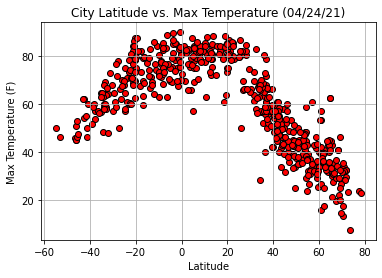

In [26]:
#Creating plot
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "red",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature (04/24/21)")
plt.savefig("Lat_vs_temp_plot")
plt.show()

Cities closest to the equator (0 latitude) will be higher in termperature. The further away from the equator, there will be a decrease in temperature.

## Latitude vs. Humidity Plot

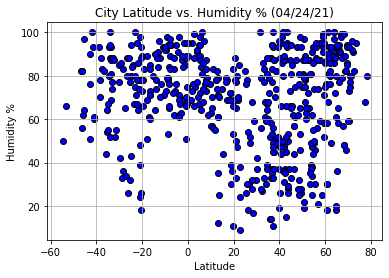

In [25]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"City Latitude vs. Humidity % (04/24/21)")
plt.savefig("Lat_vs_humidity")
plt.show()

The humidity remains fairly consistant along the equator.

## Latitude vs. Cloudiness Plot

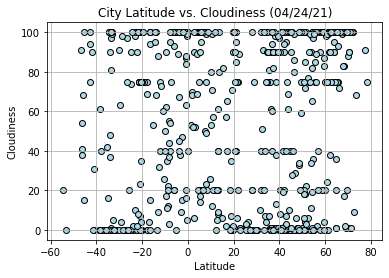

In [27]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "lightblue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness (04/24/21)")
plt.savefig("Lat_vs_clouds")
plt.show()

The cloudiness data is widely spread across the latitude.

## Latitude vs. Wind Speed Plot

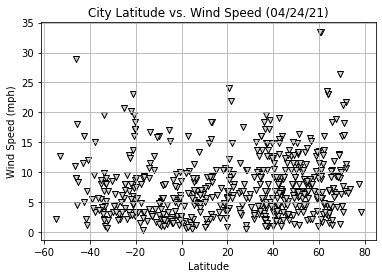

In [29]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "v", color = "lightgray",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed (04/24/21)")
plt.savefig("Lat_vs_wind")
plt.show()

The wind speed data shows that the wind speeds remain around the same speed as it passes. Perhaps it is because the wind is moving from a west-east direction and vice versa.

## Linear Regression

In [102]:
#Linear Regression y=mx+b
def linear_reg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.median(),y.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [103]:
#Create Northern and Southern Hemisphere Dataframes
northern=city_df.loc[city_df["Lat"] >=0]
southern=city_df.loc[city_df["Lat"] <0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8888439713213173


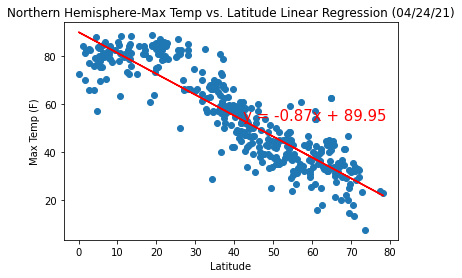

None


<Figure size 432x288 with 0 Axes>

In [104]:
x= northern["Lat"]
y= northern["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere-Max Temp vs. Latitude Linear Regression (04/24/21)")
print(linear_reg(x,y))
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The linear regression is modeling a decline in temperature as the latitude moves further from the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7594209168863817


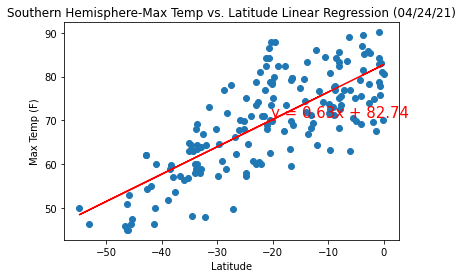

None


<Figure size 432x288 with 0 Axes>

In [105]:
x= southern["Lat"]
y= southern["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere-Max Temp vs. Latitude Linear Regression (04/24/21)")
print(linear_reg(x,y))
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The linear regression is modeling an increase in temperature as the latitude moves closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08307529825150985


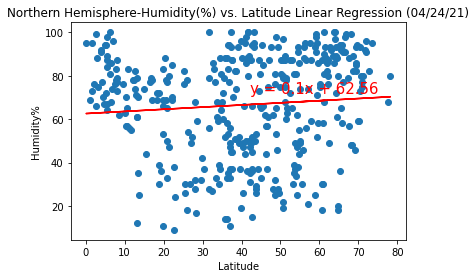

None


<Figure size 432x288 with 0 Axes>

In [106]:
x= northern["Lat"]
y= northern["Humidity"]
plt.ylabel("Humidity%")
plt.title("Northern Hemisphere-Humidity(%) vs. Latitude Linear Regression (04/24/21)")
print(linear_reg(x,y))
plt.savefig("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression.png")

The linear regression is modeling an average of 60-70% humidity between most cities in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15534421284060013


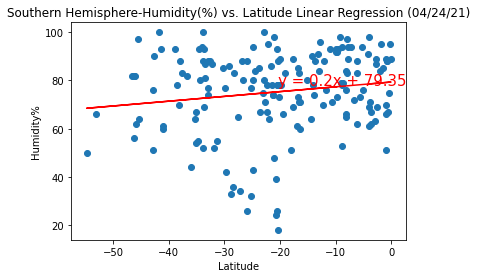

None


<Figure size 432x288 with 0 Axes>

In [107]:
x= southern["Lat"]
y= southern["Humidity"]
plt.ylabel("Humidity%")
plt.title("Southern Hemisphere-Humidity(%) vs. Latitude Linear Regression (04/24/21)")
print(linear_reg(x,y))
plt.savefig("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression.png")

The linear regression is modeling an average of 70-80% humidity between most cities in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14011777803240585


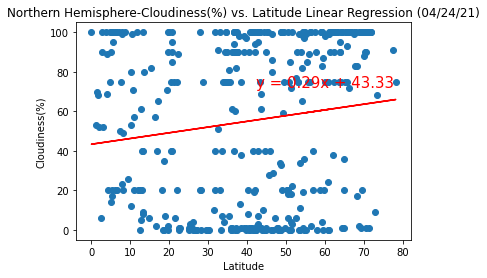

None


<Figure size 432x288 with 0 Axes>

In [108]:
x= northern["Lat"]
y= northern["Cloudiness"]
plt.ylabel("Cloudiness(%)")
plt.title("Northern Hemisphere-Cloudiness(%) vs. Latitude Linear Regression (04/24/21)")
print(linear_reg(x,y))
plt.savefig("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression.png")

The linear regression is modeling a positive correlation to cloudiness and latitude. However, cloudiness % is widely spread due to its varying nature.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17036799198739594


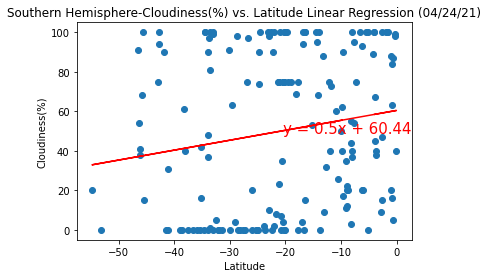

None


<Figure size 432x288 with 0 Axes>

In [109]:
x= southern["Lat"]
y= southern["Cloudiness"]
plt.ylabel("Cloudiness(%)")
plt.title("Southern Hemisphere-Cloudiness(%) vs. Latitude Linear Regression (04/24/21)")
print(linear_reg(x,y))
plt.savefig("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression.png")

The linear regression is modeling a positive correlation to cloudiness and latitude. However, cloudiness % is widely spread due to its varying nature. It appears that cloudiness is less in the Southern Hemisphere at this moment in time.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.18381513175191921


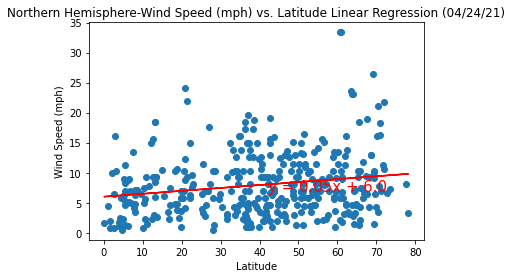

None


<Figure size 432x288 with 0 Axes>

In [110]:
x= northern["Lat"]
y= northern["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere-Wind Speed (mph) vs. Latitude Linear Regression (04/24/21)")
print(linear_reg(x,y))
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

The linear regression is modeling a positive correlation to wind speed and latitude. It appears that with the slope being so small, that most cities in the Northern Hemisphere should be experiencing similar wind speeds.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.19013587703082369


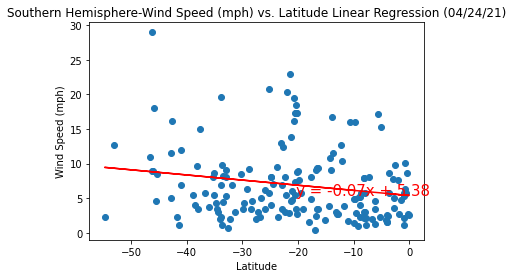

None


<Figure size 432x288 with 0 Axes>

In [111]:
x= southern["Lat"]
y= southern["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere-Wind Speed (mph) vs. Latitude Linear Regression (04/24/21)")
print(linear_reg(x,y))
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

The linear regression is modeling a negative correlation to wind speed and latitude. It appears that with the slope being so small, that most cities in the Southern Hemisphere should be experiencing similar wind speeds as it approaches the equator.